# Demo:  Predicting Glucose Levels using Mulitple Linear Regression

In this demo, you will learn how to:
* Fit multiple linear regression models using python's `sklearn` pachage.  
* Split data into training and test.
* Manipulate and visualize multivariable arrays.

We first load the packages as usual.

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## Diabetes Data Example
To illustrate the concepts, we load the well-known diabetes data set.  This dataset is included in the `sklearn.datasets` module and can be loaded as follows.

In [4]:
from sklearn import datasets, linear_model

# Load the diabetes dataset
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

We can print a description of the data as follows:

In [6]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

The target values are stored in the vector `y`.  The attributes for the diabetes data are stored in a data matrix, `X`.  The size is is number of samples (442) x number of attributes (10).

In [8]:
nsamp, natt = X.shape
print("num samples={0:d}  num attributes={1:d}".format(nsamp,natt))

num samples=442  num attributes=10


In class exercise: Print the (normalized) ages of the first 5 subjects?

In [58]:
#TODO
print(X[:5])

[[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990842 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632783 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06832974 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567061 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286377 -0.02593034]
 [-0.08906294 -0.04464164 -0.01159501 -0.03665645  0.01219057  0.02499059
  -0.03603757  0.03430886  0.02269202 -0.00936191]
 [ 0.00538306 -0.04464164 -0.03638469  0.02187235  0.00393485  0.01559614
   0.00814208 -0.00259226 -0.03199144 -0.04664087]]


In-class exercise:   Print the attributes S1-S3 for subjects 10-15

In [53]:
#TODO


[[-9.63280163e-02 -4.46416365e-02 -8.38084235e-02  8.10087222e-03
  -1.03389471e-01 -9.05611890e-02 -1.39477432e-02 -7.63945038e-02
  -6.29129499e-02 -3.42145528e-02]
 [ 2.71782911e-02  5.06801187e-02  1.75059115e-02 -3.32135761e-02
  -7.07277125e-03  4.59715403e-02 -6.54906725e-02  7.12099798e-02
  -9.64332229e-02 -5.90671943e-02]
 [ 1.62806757e-02 -4.46416365e-02 -2.88400077e-02 -9.11348125e-03
  -4.32086554e-03 -9.76888589e-03  4.49584616e-02 -3.94933829e-02
  -3.07512099e-02 -4.24987666e-02]
 [ 5.38306037e-03  5.06801187e-02 -1.89470584e-03  8.10087222e-03
  -4.32086554e-03 -1.57187067e-02 -2.90282981e-03 -2.59226200e-03
   3.83932482e-02 -1.35040182e-02]
 [ 4.53409833e-02 -4.46416365e-02 -2.56065715e-02 -1.25563519e-02
   1.76943802e-02 -6.12835791e-05  8.17748397e-02 -3.94933829e-02
  -3.19914449e-02 -7.56356220e-02]]


In class exercise:  Create a scatter plot of the target variable, `y` vs. the BMI.  Does there seem to be a relation?  What about `y` vs. the age?  Which is a better predictor?  

In [14]:
#TODO

## Using Simple Linear Regression for Each Feature Individually

As a first attempt to predict the glucouse level, we could try *one attribute at a time*.  That is, for each attribute $x_k$, we could attempt to fit a [simple linear regression](../simp_lin_reg/readme.md) model:
$$ \hat{y} = \beta_{0,k} + \beta_{1,k}x_k$$
where $\beta_{0,k}$ and $\beta_{1,k}$ are the coefficients in the simple linear regression model using only the attribute $x_k$.

Now, we saw in class, that the goodness of fit in a simple linear regression model is given by the coefficient of determination.  Let $R_k^2$ be the coefficient for predicting $y$ from the $k$-th predictor $x_k$:
$$R^2_k = \frac{|s_{x_k,y}|^2}{s_{x_k}^2 s_y^2}.$$
The following code computes $R^2_k$ for each variable $k$ as well as the coefficients in the linear model, $\beta_{0,k}$ and $\beta_{1,k}$

In [16]:
ym = np.mean(y)
syy = np.mean((y-ym)**2)
Rsq = np.zeros(natt)
beta0 = np.zeros(natt)
beta1 = np.zeros(natt)
for k in range(natt):
    xm = np.mean(X[:,k])
    sxy = np.mean((X[:,k]-xm)*(y-ym))
    sxx = np.mean((X[:,k]-xm)**2)
    beta1[k] = sxy/sxx
    beta0[k] = ym - beta1[k]*xm
    Rsq[k] = (sxy)**2/sxx/syy
    
    print("{0:2d} Rsq={1:f} beta0={2:f} beta1={3:f}".format(k,Rsq[k],beta0[k],beta1[k]))
    

 0 Rsq=0.035302 beta0=152.133484 beta1=304.183075
 1 Rsq=0.001854 beta0=152.133484 beta1=69.715356
 2 Rsq=0.343924 beta0=152.133484 beta1=949.435260
 3 Rsq=0.194908 beta0=152.133484 beta1=714.741644
 4 Rsq=0.044954 beta0=152.133484 beta1=343.254452
 5 Rsq=0.030295 beta0=152.133484 beta1=281.784593
 6 Rsq=0.155859 beta0=152.133484 beta1=-639.145279
 7 Rsq=0.185290 beta0=152.133484 beta1=696.883030
 8 Rsq=0.320224 beta0=152.133484 beta1=916.138723
 9 Rsq=0.146294 beta0=152.133484 beta1=619.222821


We see that the best $R^2_k = 0.34$.  That is, only about 34% of the variance is explained by a linear model with any one variable.  We can see this somewhat poor fit in the scatter plot as well where there is a significat variation from the regression line.
Also notice that beta0 are all the same no matter which attribute is used to predict the target!

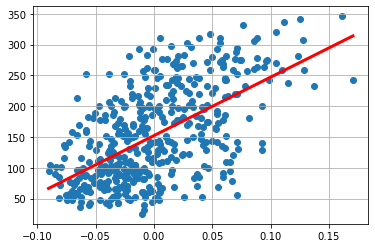

In [18]:
# Find the index of the single variable with the best R^2
imax = np.argmax(Rsq)

# Regression line over the range of x values
xmin = np.min(X[:,imax])
xmax = np.max(X[:,imax])
ymin = beta0[imax] + beta1[imax]*xmin
ymax = beta0[imax] + beta1[imax]*xmax
plt.plot([xmin,xmax], [ymin,ymax], 'r-', linewidth=3)

# Scatter plot of points
plt.scatter(X[:,imax],y)
plt.grid()

Note that the calculations above could have been done without a for-loop using Python broadcasting:

In [20]:
# Remove the means
ym = np.mean(y) 
y1 = y-ym  # a column vecotor each minus mean
Xm = np.mean(X,axis=0) # averaging over column, resulting a row vector of dimension natt
X1 = X - Xm[None,:] # minus the same mean in each column

# Compute the correlations per features
syy = np.mean(y1**2)
Sxx = np.mean(X1**2,axis=0) #a row vector with each element indicating the variance of one attribute
Sxy = np.mean(X1*y1[:,None],axis=0) #a row vector with each element indicating the covarance on one attribute to the targer

# Compute the coefficients and R^2 value per feature
beta1 = Sxy/Sxx # element wise division, resulting a row vector containing  beta1 for each attribute
beta0 = ym - beta1*Xm # element wise multiplication, resulting a row vector containing beta0 for each attribute
Rsq = Sxy**2/Sxx/syy #a row vector containing Rsq for each attribute

Now let us see whether we get the same result:

In [22]:
for k in range(natt):
    print("{0:2d} Rsq={1:f} beta0={2:f} beta1={3:f}".format(k,Rsq[k],beta0[k],beta1[k]))

 0 Rsq=0.035302 beta0=152.133484 beta1=304.183075
 1 Rsq=0.001854 beta0=152.133484 beta1=69.715356
 2 Rsq=0.343924 beta0=152.133484 beta1=949.435260
 3 Rsq=0.194908 beta0=152.133484 beta1=714.741644
 4 Rsq=0.044954 beta0=152.133484 beta1=343.254452
 5 Rsq=0.030295 beta0=152.133484 beta1=281.784593
 6 Rsq=0.155859 beta0=152.133484 beta1=-639.145279
 7 Rsq=0.185290 beta0=152.133484 beta1=696.883030
 8 Rsq=0.320224 beta0=152.133484 beta1=916.138723
 9 Rsq=0.146294 beta0=152.133484 beta1=619.222821


## Improvements with a Multiple Variable Linear Model

One possible way to try to improve the fit is to use multiple variables at the same time.  We can fit the multipe linear model using the `sklearn` package.  

For reasons that we will explain in the next demo, we need to split the data into two parts:  one part for training the model and a second part for testing the fit.  In this example, we will use `ns_test=300` samples for training and the remaining `ns_test=442-300=142` for testing.

In [24]:
ns_train = 300
ns_test = nsamp - ns_train
X_tr = X[:ns_train,:]     # Gets the first ns_train rows of X
y_tr = y[:ns_train]       # Gets the correspoinding rows of y

To fit the linear model, we first create a regression object and then fit the data with regression object.

In [26]:
regr = linear_model.LinearRegression()
regr.fit(X_tr,y_tr)

LinearRegression()

You can see the coefficients

In [28]:
regr.intercept_

152.34786451820108

In [30]:
regr.coef_

array([ -16.57607993, -254.66532396,  560.98630022,  278.91811152,
       -393.41357305,   97.05460405,  -19.0023093 ,  169.46450327,
        632.95050374,  114.21638941])

We next compute the RSS (per sample) and the R^2 on the training data

In [32]:
y_tr_pred = regr.predict(X_tr)
RSS_tr = np.mean((y_tr_pred-y_tr)**2)/(np.std(y_tr)**2)
Rsq_tr = 1-RSS_tr
print("RSS per sample = {0:f}".format(RSS_tr))
print("R^2 =            {0:f}".format(Rsq_tr))

RSS per sample = 0.485281
R^2 =            0.514719


We see R^2 is higher than the best single variable model -- more than 51% of the target variance is explained by the model instead of just 34% for the best single variable model.  

We also create a scatter plot of predicted vs. actual

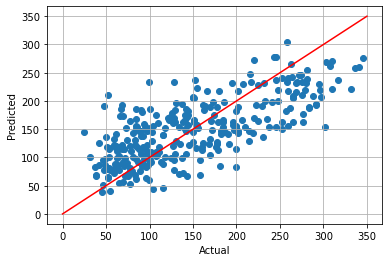

In [34]:
plt.scatter(y_tr,y_tr_pred)
plt.plot([0,350],[0,350],'r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()

## Validate on Test Data

As we will explain in the next lab, one should not evaluate the performance of a model on the data on which it is trained.  It is important to see how the model works on *new* data that is independent of the training data set.  For this reason, we will evaluate the model on the *test* samples that were not used in training.

In [36]:
X_test = X[ns_train:,:]
y_test = y[ns_train:]
y_test_pred = regr.predict(X_test)
RSS_test = np.mean((y_test_pred-y_test)**2)/(np.std(y_test)**2)
Rsq_test = 1-RSS_test
print("RSS per sample = {0:f}".format(RSS_test))
print("R^2 =            {0:f}".format(Rsq_test))

RSS per sample = 0.492801
R^2 =            0.507199


We see that the model predicts new samples almost as well as it did the training samples.  We can also plot the fit on the test data.

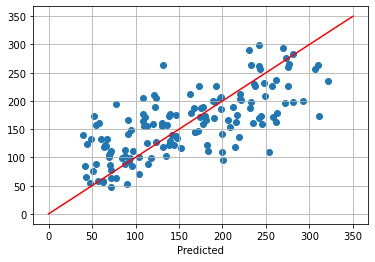

In [38]:
plt.scatter(y_test,y_test_pred)
plt.plot([0,350],[0,350],'r')
plt.xlabel('Actual')
plt.xlabel('Predicted')
plt.grid()

## Manually Computing the Coefficients

We can manually compute the regression coefficients using the least-squares matrix formula in class.  Of course, using the `sklearn` package is easier.  I illustrate the manual computation only to show what is happening "under the hood" of the linear regression routine. 

To compute the coefficients manually, we first construct the matrix $\mathbf{A} = [ \mathbf{1} ~ \mathbf{X} ]$.  This is performed with the `ones` command and `hstack`.  Note that after we do this, `A` has 11 columns -- one more column that the data matrix `X_tr`.

In [40]:
ones = np.ones((ns_train,1))
A = np.hstack((ones,X_tr))
A.shape

(300, 11)

We next use the `lstsq` method to solve $\mathbf{y} \approx \mathbf{A\beta}$.  This will find the desired least-squares fit.

In [42]:
out = np.linalg.lstsq(A,y_tr,rcond=None)
beta = out[0]

We can see the coefficients

In [44]:
beta

array([ 152.34786452,  -16.57607993, -254.66532396,  560.98630022,
        278.91811152, -393.41357305,   97.05460405,  -19.0023093 ,
        169.46450327,  632.95050374,  114.21638941])

We see that `beta[0]` mathches the intercept in `regr.intercept_` from the regression fit and `beta[1:]` matches the coefficients in `regr.coef_`.

In [46]:
regr.coef_

array([ -16.57607993, -254.66532396,  560.98630022,  278.91811152,
       -393.41357305,   97.05460405,  -19.0023093 ,  169.46450327,
        632.95050374,  114.21638941])

In [48]:
regr.intercept_

152.34786451820108

Now let us verify this is the same as direct matrix calculation.  For a small problem like this, it makes no difference.  But, in general, using a matrix inverse like this is *much* slower computationally than using either the `lstsq` method or the `LinearRegression` class.  So, **do not ever** solve a least squares problem like this.

In [50]:
beta = np.linalg.inv(A.T.dot(A)).dot(A.T.dot(y_tr))
print(beta)

[ 152.34786452  -16.57607993 -254.66532396  560.98630022  278.91811152
 -393.41357305   97.05460405  -19.0023093   169.46450327  632.95050374
  114.21638941]


## In-Class Simple Exercise

You are given target values `y` and features `x1` and `x2` below.  Fit the model on the first 4 data points and test the model on the fifth data point.  You may want to use the following steps

*  Construct the training training data `X_tr,y_tr`
*  Create a regression object `regr = linear_model.LinearRegression()`
*  Fit the model with the `regr.fit()` method
*  Predict the value on the test value with the `regr.predict()`

In [52]:
x1 = np.array([0,1,3,5,4])
x2 = np.array([0,0.7, 4.3, 15.1, 13.2])
y = np.array([-2, -0.9, 1.5, 18, 13])

# TODO